## Test for Making Figures for ID Boise NF Timber Harvest Treatments

### Author: Katie Murenbeeld
### Init_Date: 10 May 2019
### Update: 23 May 2019

#### Testing out making different stacked bar plots and other figures to represent the changes in timber harvest treatments through time in Idaho National Forests.

In [2]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [3]:
# Set the directory for the modified data
mod_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/MOD/'

In [4]:
# Read in csv and check data
ID_BNF_TH = pd.read_csv(mod_data_dir + 'ID_BNF_TH.csv').reset_index()
ID_BNF_TH.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp
0,0,282,Commercial Thin,4220,11.0,2009-09-30,2009-09-30,NaN,Boise National Forest,ID,2009-09-30,2009-09-30,NaN
1,1,814,Commercial Thin,4220,25.0,2011-10-03,2012-02-21,NaN,Boise National Forest,ID,2011-10-03,2012-02-21,NaN
2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15
3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24
4,4,2522,Commercial Thin,4220,12.0,2005-08-15,2005-10-15,NaN,Boise National Forest,ID,2005-08-15,2005-10-15,NaN


In [5]:
ID_BNF_TH_COMP = ID_BNF_TH.dropna(axis=0).reset_index()
ID_BNF_TH_COMP.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp
0,2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15
1,3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24
2,5,5,2764,Commercial Thin,4220,27.0,2008-07-15,2008-12-15,2008-12-15,Boise National Forest,ID,2008-07-15,2008-12-15,2008-12-15
3,7,7,4449,Stand Clearcut (EA/RH/FH),4113,6.0,2002-09-15,2002-09-15,2002-09-15,Boise National Forest,ID,2002-09-15,2002-09-15,2002-09-15
4,8,8,5501,"Salvage Cut (intermediate treatment, not regen...",4231,4.0,1992-09-30,1992-09-30,1992-09-30,Boise National Forest,ID,1992-09-30,1992-09-30,1992-09-30


In [6]:
# Make the DATE_PLANN into serial dates
ID_BNF_TH_datearrP = ID_BNF_TH['DATE_PLANN'].values
ID_BNF_TH_datearr_dtP = pd.to_datetime(ID_BNF_TH_datearrP)
ID_BNF_TH['SerDatesPlan'] = ID_BNF_TH_datearr_dtP

In [7]:
# Break out the year, month, and day and add as a column to the array
ID_BNF_TH['Y'] = ID_BNF_TH['SerDatesPlan'].dt.year
ID_BNF_TH['M'] = ID_BNF_TH['SerDatesPlan'].dt.month
ID_BNF_TH['D'] = ID_BNF_TH['SerDatesPlan'].dt.day
#ID_BNF_TH.to_csv('ID_BNF_TH_DATES.csv', sep='\t', encoding='utf-8')
ID_BNF_TH.head(10)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,282,Commercial Thin,4220,11.0,2009-09-30,2009-09-30,NaN,Boise National Forest,ID,2009-09-30,2009-09-30,NaN,2009,9,30
1,1,814,Commercial Thin,4220,25.0,2011-10-03,2012-02-21,NaN,Boise National Forest,ID,2011-10-03,2012-02-21,NaN,2011,10,3
2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15,2001,1,14
3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24,2008,7,15
4,4,2522,Commercial Thin,4220,12.0,2005-08-15,2005-10-15,NaN,Boise National Forest,ID,2005-08-15,2005-10-15,NaN,2005,8,15
5,5,2764,Commercial Thin,4220,27.0,2008-07-15,2008-12-15,2008-12-15,Boise National Forest,ID,2008-07-15,2008-12-15,2008-12-15,2008,7,15
6,6,2804,Commercial Thin,4220,0.0,2007-07-15,NaN,NaN,Boise National Forest,ID,2007-07-15,NaN,NaN,2007,7,15
7,7,4449,Stand Clearcut (EA/RH/FH),4113,6.0,2002-09-15,2002-09-15,2002-09-15,Boise National Forest,ID,2002-09-15,2002-09-15,2002-09-15,2002,9,15
8,8,5501,"Salvage Cut (intermediate treatment, not regen...",4231,4.0,1992-09-30,1992-09-30,1992-09-30,Boise National Forest,ID,1992-09-30,1992-09-30,1992-09-30,1992,9,30
9,9,6492,Shelterwood Establishment Cut (with or without...,4131,8.0,2009-09-30,2009-09-30,2011-08-15,Boise National Forest,ID,2009-09-30,2009-09-30,2011-08-15,2009,9,30


In [8]:
# Repeat for Completed Activities

# Make the DATE_COMPL into serial dates
ID_BNF_TH_COMP_datearrP = ID_BNF_TH_COMP['DATE_COMPL'].values
ID_BNF_TH_COMP_datearr_dtP = pd.to_datetime(ID_BNF_TH_COMP_datearrP)
ID_BNF_TH_COMP['SerDatesComp'] = ID_BNF_TH_COMP_datearr_dtP

In [9]:
# Break out the year, month, and day and add as a column to the array
ID_BNF_TH_COMP['Y'] = ID_BNF_TH_COMP['SerDatesComp'].dt.year
ID_BNF_TH_COMP['M'] = ID_BNF_TH_COMP['SerDatesComp'].dt.month
ID_BNF_TH_COMP['D'] = ID_BNF_TH_COMP['SerDatesComp'].dt.day
#ID_BNF_TH.to_csv('ID_BNF_TH_DATES.csv', sep='\t', encoding='utf-8')
ID_BNF_TH_COMP.head(10)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15,2007,9,15
1,3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24,2008,10,24
2,5,5,2764,Commercial Thin,4220,27.0,2008-07-15,2008-12-15,2008-12-15,Boise National Forest,ID,2008-07-15,2008-12-15,2008-12-15,2008,12,15
3,7,7,4449,Stand Clearcut (EA/RH/FH),4113,6.0,2002-09-15,2002-09-15,2002-09-15,Boise National Forest,ID,2002-09-15,2002-09-15,2002-09-15,2002,9,15
4,8,8,5501,"Salvage Cut (intermediate treatment, not regen...",4231,4.0,1992-09-30,1992-09-30,1992-09-30,Boise National Forest,ID,1992-09-30,1992-09-30,1992-09-30,1992,9,30
5,9,9,6492,Shelterwood Establishment Cut (with or without...,4131,8.0,2009-09-30,2009-09-30,2011-08-15,Boise National Forest,ID,2009-09-30,2009-09-30,2011-08-15,2011,8,15
6,10,10,6827,Shelterwood Establishment Cut (with or without...,4131,15.0,1998-11-15,1998-11-15,1998-11-15,Boise National Forest,ID,1998-11-15,1998-11-15,1998-11-15,1998,11,15
7,12,12,7550,"Salvage Cut (intermediate treatment, not regen...",4231,25.0,1996-08-01,1996-08-01,1996-08-01,Boise National Forest,ID,1996-08-01,1996-08-01,1996-08-01,1996,8,1
8,15,15,8279,Commercial Thin,4220,38.0,2014-08-15,2014-08-19,2016-09-21,Boise National Forest,ID,2014-08-15,2014-08-19,2016-09-21,2016,9,21
9,16,16,8510,Commercial Thin,4220,13.0,2006-01-20,2006-01-20,2007-04-25,Boise National Forest,ID,2006-01-20,2006-01-20,2007-04-25,2007,4,25


### Let's make a time series lone plot

In [10]:
# Group data by year

#ID_BNF_TH_year = ID_BNF_TH['Y'].values
ID_BNF_TH_year = ID_BNF_TH.groupby('Y').sum() 
ID_BNF_TH_year = ID_BNF_TH_year.reset_index()
ID_BNF_TH_year

,Y,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1967,26721,16284030,86373,441.0,180,543
1,1985,2703,1631496,12453,27.0,30,3
2,1988,2649,1602393,12453,6.0,27,90
3,1989,14655,8944134,49548,198.0,105,138
4,1990,56625,34528008,185439,618.0,432,426
5,1992,20766,12673896,76158,561.0,162,477
6,1993,8301,5055948,25320,603.0,60,78
7,1996,26448,16111251,88851,1104.0,177,21
8,1997,88437,53692509,264615,2778.0,525,654
9,1998,40746,24866706,136053,555.0,351,495


In [11]:
# Create variables for the year and area treated for use in plotting

Year_BNF_TH = ID_BNF_TH_year['Y'].values
BNF_TH_Acres = ID_BNF_TH_year['NBR_UNITS1'].values

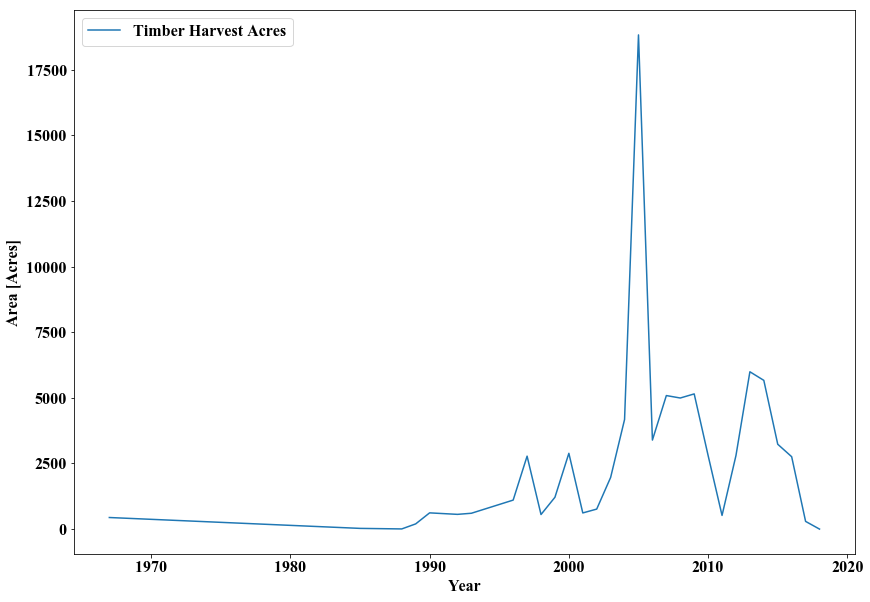

In [12]:
# Use matplotlib and RCparams to create a line plot of treatments through time

fig1 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(Year_BNF_TH,BNF_TH_Acres,label="Timber Harvest Acres")
#plt.plot(Year_MTBS,MTBS_Acres, color='red', label="Burned Acres")
#plt.plot(Year_RAVG,RAVG_Acres, color='red')
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
#plt.title('Area Burned in Boise National Forest')
#plt.savefig('Area_Burned_HFT_BNF.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

In [13]:
# Repeat for completed activities

# Group data by year

#ID_BNF_TH_year = ID_BNF_TH['Y'].values
ID_BNF_TH_COMP_year = ID_BNF_TH_COMP.groupby('Y').sum() 
ID_BNF_TH_COMP_year = ID_BNF_TH_COMP_year.reset_index()
ID_BNF_TH_COMP_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1967,26721,26721,16284030,86373,441.0,180,543
1,1985,2703,2703,1631496,12453,27.0,30,3
2,1988,2649,2649,1602393,12453,6.0,27,90
3,1989,14655,14655,8944134,49548,198.0,108,180
4,1990,56625,56625,34528008,185439,618.0,432,468
5,1992,20766,20766,12673896,76158,561.0,162,477
6,1996,26448,26448,16111251,88851,1104.0,177,21
7,1997,45030,45030,27323712,138015,1578.0,315,264
8,1998,40746,40746,24866706,136053,555.0,351,495
9,1999,65883,65883,39966279,199560,1212.0,354,426


In [14]:
# Create variables for the year and area treated for use in plotting

Year_BNF_TH_COMP = ID_BNF_TH_COMP_year['Y'].values
BNF_TH_Acres_COMP = ID_BNF_TH_COMP_year['NBR_UNITS1'].values

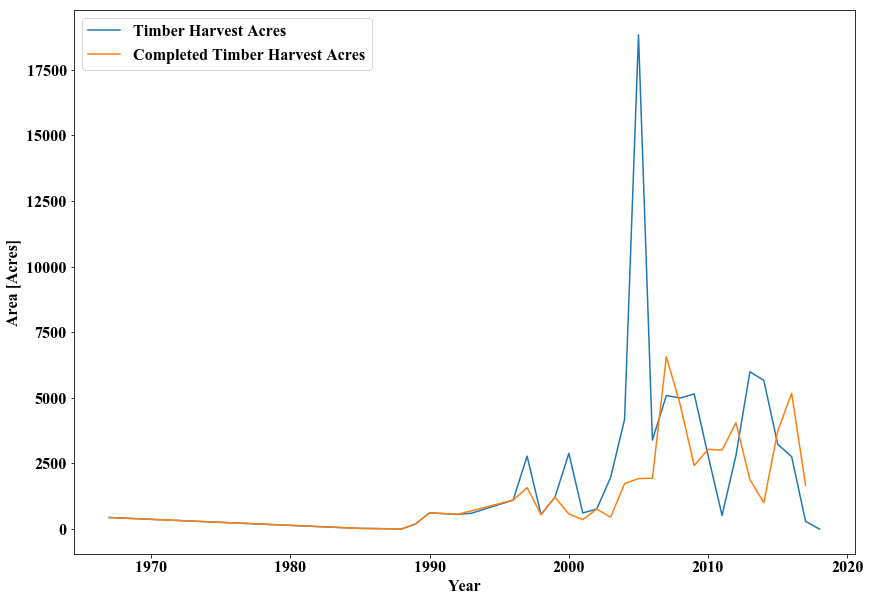

In [15]:
# Use matplotlib and RCparams to create a line plot of treatments through time
# Let's compare the two lines

fig2 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(Year_BNF_TH,BNF_TH_Acres,label="Timber Harvest Acres")
plt.plot(Year_BNF_TH_COMP,BNF_TH_Acres_COMP,label="Completed Timber Harvest Acres")
#plt.plot(Year_RAVG,RAVG_Acres, color='red')
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
#plt.title('Area Burned in Boise National Forest')
#plt.savefig('Area_Burned_HFT_BNF.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

### Let's start the stacked bar charts

### First we need to find the most common activities 

In [16]:
# Use the groupby and sorting ".nlargest" to find the top ten timber harvest activities.

bnf_th_topten = ID_BNF_TH[['ACTIVITY_N','ACTIVITY_2']]
bnf_th_topten = bnf_th_topten.groupby(['ACTIVITY_N'])['ACTIVITY_2'].size().nlargest(10)
bnf_th_topten = bnf_th_topten.reset_index(name='TopTenCount')
bnf_th_topten

,ACTIVITY_N,TopTenCount
0,Commercial Thin,1182
1,Improvement Cut,300
2,"Salvage Cut (intermediate treatment, not regen...",297
3,Shelterwood Establishment Cut (with or without...,225
4,Stand Clearcut (EA/RH/FH),129
5,Sanitation Cut,102
6,Group Selection Cut (UA/RH/FH),99
7,Shelterwood Preparatory Cut (EA/NRH/NFH),63
8,Single-tree Selection Cut (UA/RH/FH),51
9,Shelterwood Removal Cut (EA/NRH/FH),36


In [17]:
# Use .loc to sort out the specific treatment --> can use the name string or the numerical activity code
# In this case the most common timber harvest activity planned in BNF is commercial thins

ID_BNF_THcommerthin = ID_BNF_TH.loc[ID_BNF_TH['ACTIVITY_N'] == 'Commercial Thin'].copy()
ID_BNF_THcommerthin.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,282,Commercial Thin,4220,11.0,2009-09-30,2009-09-30,NaN,Boise National Forest,ID,2009-09-30,2009-09-30,NaN,2009,9,30
1,1,814,Commercial Thin,4220,25.0,2011-10-03,2012-02-21,NaN,Boise National Forest,ID,2011-10-03,2012-02-21,NaN,2011,10,3
2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15,2001,1,14
4,4,2522,Commercial Thin,4220,12.0,2005-08-15,2005-10-15,NaN,Boise National Forest,ID,2005-08-15,2005-10-15,NaN,2005,8,15
5,5,2764,Commercial Thin,4220,27.0,2008-07-15,2008-12-15,2008-12-15,Boise National Forest,ID,2008-07-15,2008-12-15,2008-12-15,2008,7,15


In [18]:
# Sort out the second most common activity planned --> Improvement Cut

ID_BNF_THimprovecut = ID_BNF_TH.loc[ID_BNF_TH['ACTIVITY_N'] == 'Improvement Cut'].copy()
ID_BNF_THimprovecut.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
11,11,7407,Improvement Cut,4210,63.0,2005-10-07,2005-11-30,NaN,Boise National Forest,ID,2005-10-07,2005-11-30,NaN,2005,10,7
30,30,16078,Improvement Cut,4210,0.0,2011-09-30,NaN,NaN,Boise National Forest,ID,2011-09-30,NaN,NaN,2011,9,30
32,32,16623,Improvement Cut,4210,40.0,2013-09-26,2013-09-26,2014-11-17,Boise National Forest,ID,2013-09-26,2013-09-26,2014-11-17,2013,9,26
51,51,28958,Improvement Cut,4210,32.0,2005-10-15,2005-10-15,2005-10-15,Boise National Forest,ID,2005-10-15,2005-10-15,2005-10-15,2005,10,15
60,60,41258,Improvement Cut,4210,60.0,2015-09-24,2015-09-28,2016-09-21,Boise National Forest,ID,2015-09-24,2015-09-28,2016-09-21,2015,9,24


In [19]:
# Sort out the third most common activity planned --> Salavge Cut, use ACTIVITY_C number instead of string name

ID_BNF_THsalvcut = ID_BNF_TH.loc[ID_BNF_TH['ACTIVITY_2'] == 4231].copy()
ID_BNF_THsalvcut.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24,2008,7,15
8,8,5501,"Salvage Cut (intermediate treatment, not regen...",4231,4.0,1992-09-30,1992-09-30,1992-09-30,Boise National Forest,ID,1992-09-30,1992-09-30,1992-09-30,1992,9,30
12,12,7550,"Salvage Cut (intermediate treatment, not regen...",4231,25.0,1996-08-01,1996-08-01,1996-08-01,Boise National Forest,ID,1996-08-01,1996-08-01,1996-08-01,1996,8,1
36,36,20775,"Salvage Cut (intermediate treatment, not regen...",4231,6.4,2010-08-07,2010-08-07,2010-09-15,Boise National Forest,ID,2010-08-07,2010-08-07,2010-09-15,2010,8,7
76,76,51108,"Salvage Cut (intermediate treatment, not regen...",4231,1.2,2011-02-08,2011-02-08,NaN,Boise National Forest,ID,2011-02-08,2011-02-08,NaN,2011,2,8


In [20]:
# Repeat for the completed activites

# Use the groupby and sorting ".nlargest" to find the top ten timber harvest activities.

bnf_th_comp_topten = ID_BNF_TH_COMP[['ACTIVITY_N','ACTIVITY_2']]
bnf_th_comp_topten = bnf_th_comp_topten.groupby(['ACTIVITY_N'])['ACTIVITY_2'].size().nlargest(10)
bnf_th_comp_topten = bnf_th_comp_topten.reset_index(name='TopTenCount')
bnf_th_comp_topten

,ACTIVITY_N,TopTenCount
0,Commercial Thin,858
1,Shelterwood Establishment Cut (with or without...,189
2,"Salvage Cut (intermediate treatment, not regen...",174
3,Stand Clearcut (EA/RH/FH),129
4,Improvement Cut,117
5,Shelterwood Preparatory Cut (EA/NRH/NFH),60
6,Sanitation Cut,57
7,Single-tree Selection Cut (UA/RH/FH),48
8,Group Selection Cut (UA/RH/FH),42
9,Overstory Removal Cut (from advanced regenerat...,15


In [21]:
# Use .loc to sort out the specific treatment --> can use the name string or the numerical activity code
# In this case the most common timber harvest activity completed in BNF in commercial thins

ID_BNF_TH_COMP_commerthin = ID_BNF_TH_COMP.loc[ID_BNF_TH_COMP['ACTIVITY_N'] == 'Commercial Thin'].copy()
ID_BNF_TH_COMP_commerthin.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15,2007,9,15
2,5,5,2764,Commercial Thin,4220,27.0,2008-07-15,2008-12-15,2008-12-15,Boise National Forest,ID,2008-07-15,2008-12-15,2008-12-15,2008,12,15
8,15,15,8279,Commercial Thin,4220,38.0,2014-08-15,2014-08-19,2016-09-21,Boise National Forest,ID,2014-08-15,2014-08-19,2016-09-21,2016,9,21
9,16,16,8510,Commercial Thin,4220,13.0,2006-01-20,2006-01-20,2007-04-25,Boise National Forest,ID,2006-01-20,2006-01-20,2007-04-25,2007,4,25
10,17,17,9084,Commercial Thin,4220,44.0,2009-07-15,2009-07-15,2009-07-15,Boise National Forest,ID,2009-07-15,2009-07-15,2009-07-15,2009,7,15


In [22]:
# Sort out the second most common activity completed --> Shelterwood Cut

ID_BNF_TH_COMP_sheltcut = ID_BNF_TH_COMP.loc[ID_BNF_TH_COMP['ACTIVITY_2'] == 4131].copy()
ID_BNF_TH_COMP_sheltcut.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
5,9,9,6492,Shelterwood Establishment Cut (with or without...,4131,8.0,2009-09-30,2009-09-30,2011-08-15,Boise National Forest,ID,2009-09-30,2009-09-30,2011-08-15,2011,8,15
6,10,10,6827,Shelterwood Establishment Cut (with or without...,4131,15.0,1998-11-15,1998-11-15,1998-11-15,Boise National Forest,ID,1998-11-15,1998-11-15,1998-11-15,1998,11,15
14,21,21,11390,Shelterwood Establishment Cut (with or without...,4131,46.0,2007-09-15,2007-09-15,2007-09-15,Boise National Forest,ID,2007-09-15,2007-09-15,2007-09-15,2007,9,15
24,35,35,20547,Shelterwood Establishment Cut (with or without...,4131,50.0,2007-09-15,2007-09-15,2007-09-15,Boise National Forest,ID,2007-09-15,2007-09-15,2007-09-15,2007,9,15
29,40,40,22770,Shelterwood Establishment Cut (with or without...,4131,150.0,1999-08-15,1999-08-15,1999-08-15,Boise National Forest,ID,1999-08-15,1999-08-15,1999-08-15,1999,8,15


In [23]:
# Sort out the third most common activity completed --> Salvage Cut

ID_BNF_TH_COMP_salvcut = ID_BNF_TH_COMP.loc[ID_BNF_TH_COMP['ACTIVITY_2'] == 4231].copy()
ID_BNF_TH_COMP_salvcut.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
1,3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24,2008,10,24
4,8,8,5501,"Salvage Cut (intermediate treatment, not regen...",4231,4.0,1992-09-30,1992-09-30,1992-09-30,Boise National Forest,ID,1992-09-30,1992-09-30,1992-09-30,1992,9,30
7,12,12,7550,"Salvage Cut (intermediate treatment, not regen...",4231,25.0,1996-08-01,1996-08-01,1996-08-01,Boise National Forest,ID,1996-08-01,1996-08-01,1996-08-01,1996,8,1
25,36,36,20775,"Salvage Cut (intermediate treatment, not regen...",4231,6.4,2010-08-07,2010-08-07,2010-09-15,Boise National Forest,ID,2010-08-07,2010-08-07,2010-09-15,2010,9,15
57,80,80,53807,"Salvage Cut (intermediate treatment, not regen...",4231,60.0,1992-09-30,1992-09-30,1992-09-30,Boise National Forest,ID,1992-09-30,1992-09-30,1992-09-30,1992,9,30


In [24]:
# The next next is to group the data by year and export as csv
# Start with all the planned treatments

ID_BNF_THcommerthin_year = ID_BNF_THcommerthin.groupby('Y').sum() 
ID_BNF_THcommerthin_year = ID_BNF_THcommerthin_year.reset_index()
ID_BNF_THcommerthin_year.to_csv(mod_data_dir + 'ID_BNF_THcommerthin_year.csv', encoding = 'utf-8')

In [25]:
#Check the data

ID_BNF_THcommerthin_year

,Y,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1993,8301,5055948,25320,603.0,60,78
1,1997,68943,41860068,202560,1470.0,399,597
2,2000,47412,28936191,164580,1842.0,378,711
3,2001,6003,3683391,25320,255.0,21,45
4,2002,4869,2941170,12660,108.0,24,27
5,2003,50391,30651222,177240,1968.0,279,606
6,2004,133467,81236364,443100,2850.0,204,1533
7,2005,278013,169015467,898860,15567.6,1821,2679
8,2006,118449,72104706,379800,2964.0,306,1500
9,2007,209808,127531818,670980,4041.0,1275,2157


In [26]:
ID_BNF_THimprovecut_year = ID_BNF_THimprovecut.groupby('Y').sum() 
ID_BNF_THimprovecut_year = ID_BNF_THimprovecut_year.reset_index()
ID_BNF_THimprovecut_year.to_csv(mod_data_dir + 'ID_BNF_THimprovecut_year.csv', encoding = 'utf-8')

ID_BNF_THimprovecut_year

,Y,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,2004,4005,2427321,12630,0.0,18,90
1,2005,41499,25311831,151560,2262.0,294,408
2,2007,3495,2165946,12630,18.0,27,45
3,2008,39729,24175074,126300,351.0,261,450
4,2009,34899,21275598,113670,465.0,225,405
5,2011,2652,1602396,12630,0.0,27,90
6,2012,3102,1901637,12630,390.0,21,45
7,2013,180555,109965906,580980,5388.0,1242,3522
8,2015,45906,27934131,151560,687.0,324,864
9,2016,18639,11364531,63150,933.0,180,312


In [27]:
ID_BNF_THsalvcut_year = ID_BNF_THsalvcut.groupby('Y').sum() 
ID_BNF_THsalvcut_year = ID_BNF_THsalvcut_year.reset_index()
ID_BNF_THsalvcut_year.to_csv(mod_data_dir + 'ID_BNF_THsalvcut_year.csv', encoding = 'utf-8')

ID_BNF_THsalvcut_year

,Y,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1992,20766,12673896,76158,561.0,162,477
1,1996,26448,16111251,88851,1104.0,177,21
2,2007,6468,3963102,25386,189.0,60,60
3,2008,21303,12977529,76158,789.0,90,186
4,2009,4614,2776401,12693,6.0,18,45
5,2010,101742,62206527,342711,326.4,558,927
6,2011,52530,31918839,165009,262.8,78,312
7,2013,70299,42756162,215781,603.0,345,732
8,2014,4158,2531850,12693,93.0,9,72
9,2015,49935,30448917,165009,444.0,351,39


In [28]:
# Now repeat for the completed activities

ID_BNF_TH_COMP_commerthin_year = ID_BNF_TH_COMP_commerthin.groupby('Y').sum()
ID_BNF_TH_COMP_commerthin_year = ID_BNF_TH_COMP_commerthin_year.reset_index()
ID_BNF_TH_COMP_commerthin_year.to_csv(mod_data_dir + 'ID_BNF_TH_COMP_commerthin_year.csv', encoding = 'utf-8')

ID_BNF_TH_COMP_commerthin_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1997,25536,25536,15491271,75960,270.0,189,207
1,2000,28638,28638,17492829,101280,432.0,243,276
2,2002,4869,4869,2941170,12660,108.0,24,27
3,2003,8295,8295,5046444,25320,453.0,63,93
4,2004,23367,23367,14243733,75960,903.0,117,315
5,2005,33687,33687,20471145,113940,786.9,261,540
6,2006,21117,21117,12816963,63300,333.0,102,225
7,2007,287190,287190,174660339,936840,5619.0,1482,4080
8,2008,66006,66006,40141695,215220,1980.0,594,774
9,2009,45111,45111,27368832,139260,2418.0,198,561


In [29]:
ID_BNF_TH_COMP_sheltcut_year = ID_BNF_TH_COMP_sheltcut.groupby('Y').sum()
ID_BNF_TH_COMP_sheltcut_year = ID_BNF_TH_COMP_sheltcut_year.reset_index()
ID_BNF_TH_COMP_sheltcut_year.to_csv(mod_data_dir + 'ID_BNF_TH_COMP_sheltcut_year.csv', encoding = 'utf-8')

ID_BNF_TH_COMP_sheltcut_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1990,10725,10725,6567945,37179,159.0,96,51
1,1998,20031,20031,12232752,74358,453.0,192,270
2,1999,43779,43779,26575617,136323,912.0,264,369
3,2001,4710,4710,2855817,12393,12.0,33,45
4,2002,12309,12309,7489620,37179,48.0,81,135
5,2004,13560,13560,8294184,49572,405.0,126,54
6,2005,2841,2841,1746960,12393,24.0,27,45
7,2006,14565,14565,8878206,49572,81.0,96,291
8,2007,33855,33855,20585388,111537,645.0,243,405
9,2008,20439,20439,12400992,61965,378.0,162,141


In [30]:
ID_BNF_TH_COMP_salvcut_year = ID_BNF_TH_COMP_salvcut.groupby('Y').sum()
ID_BNF_TH_COMP_salvcut_year = ID_BNF_TH_COMP_salvcut_year.reset_index()
ID_BNF_TH_COMP_salvcut_year.to_csv(mod_data_dir + 'ID_BNF_TH_COMP_salvcut_year.csv', encoding = 'utf-8')

ID_BNF_TH_COMP_salvcut_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_2,NBR_UNITS1,M,D
0,1992,20766,20766,12673896,76158,561.0,162,477
1,1996,26448,26448,16111251,88851,1104.0,177,21
2,2008,16737,16737,10199808,63465,834.0,147,294
3,2010,48384,48384,29540613,165009,133.2,351,585
4,2013,29430,29430,17880441,88851,270.0,201,288
5,2014,4158,4158,2531850,12693,93.0,21,45
6,2015,51678,51678,31474251,165009,606.0,384,189
7,2016,5943,5943,3655476,25386,29.4,54,33
8,2017,17667,17667,10742658,50772,279.0,54,159


### Because the arrays or dataframes need to be the same size to create the stacked bar plots, you will need to make sure that all years are represented in the file even if no area was treated. I ended up adjusting the .csvs on my laptop and reading in the modified csv. I'm sure there is a way to do this in python without having to export the csv and re-importing the modified csv.

In [31]:
# Read in and check the modified csvs
ID_BNF_THcommerthin_year_mod = pd.read_csv(mod_data_dir + 'ID_BNF_THcommerthin_year_mod.csv').reset_index(drop=True)
ID_BNF_THcommerthin_year_mod.head(5)

,Unnamed: 0,Y,index,Unnamed: 0.1,ACTIVITY_2,NBR_UNITS1,M,D
0,0,1990,NaN,NaN,NaN,0.0,NaN,NaN
1,1,1991,NaN,NaN,NaN,0.0,NaN,NaN
2,2,1992,NaN,NaN,NaN,0.0,NaN,NaN
3,3,1993,8301.0,5055948.0,25320.0,603.0,60.0,78.0
4,4,1994,NaN,NaN,NaN,0.0,NaN,NaN


In [32]:
ID_BNF_THimprovecut_year_mod = pd.read_csv(mod_data_dir + 'ID_BNF_THimprovecut_year_mod.csv').reset_index(drop=True)
ID_BNF_THimprovecut_year_mod.head(5)

,Unnamed: 0,Y,index,Unnamed: 0.1,ACTIVITY_2,NBR_UNITS1,M,D
0,0,1990,NaN,NaN,NaN,0,NaN,NaN
1,1,1991,NaN,NaN,NaN,0,NaN,NaN
2,2,1992,NaN,NaN,NaN,0,NaN,NaN
3,3,1993,NaN,NaN,NaN,0,NaN,NaN
4,4,1994,NaN,NaN,NaN,0,NaN,NaN


In [33]:
ID_BNF_THsalvcut_year_mod = pd.read_csv(mod_data_dir + 'ID_BNF_THsalvcut_year_mod.csv').reset_index(drop=True)
ID_BNF_THsalvcut_year_mod.head(5)

,Unnamed: 0,Y,index,Unnamed: 0.1,ACTIVITY_2,NBR_UNITS1,M,D
0,0,1990,NaN,NaN,NaN,0.0,NaN,NaN
1,1,1991,NaN,NaN,NaN,0.0,NaN,NaN
2,2,1992,20766.0,12673896.0,76158.0,561.0,162.0,477.0
3,3,1993,NaN,NaN,NaN,0.0,NaN,NaN
4,4,1994,NaN,NaN,NaN,0.0,NaN,NaN


In [34]:
ID_BNF_TH_COMP_commerthin_year_mod = pd.read_csv(mod_data_dir + 'ID_BNF_TH_COMP_commerthin_year_mod.csv').reset_index(drop=True)
ID_BNF_TH_COMP_commerthin_year_mod.head(5)

,Unnamed: 0,Y,level_0,index,Unnamed: 0.1,ACTIVITY_2,NBR_UNITS1,M,D
0,0,1990,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,1,1991,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2,1992,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,3,1993,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,4,1994,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [35]:
ID_BNF_TH_COMP_sheltcut_year_mod = pd.read_csv(mod_data_dir + 'ID_BNF_TH_COMP_sheltcut_year_mod.csv').reset_index(drop=True)
ID_BNF_TH_COMP_sheltcut_year_mod.head(5)

,Unnamed: 0,Y,level_0,index,Unnamed: 0.1,ACTIVITY_2,NBR_UNITS1,M,D
0,0,1990,10725.0,10725.0,6567945.0,37179.0,159,96.0,51.0
1,1,1991,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2,1992,NaN,NaN,NaN,NaN,0,NaN,NaN
3,3,1993,NaN,NaN,NaN,NaN,0,NaN,NaN
4,4,1994,NaN,NaN,NaN,NaN,0,NaN,NaN


In [36]:
ID_BNF_TH_COMP_salvcut_year_mod = pd.read_csv(mod_data_dir + 'ID_BNF_TH_COMP_salvcut_year_mod.csv').reset_index(drop=True)
ID_BNF_TH_COMP_salvcut_year_mod.head(5)

,Unnamed: 0,Y,level_0,index,Unnamed: 0.1,ACTIVITY_2,NBR_UNITS1,M,D
0,0,1990,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,1,1991,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2,1992,20766.0,20766.0,12673896.0,76158.0,561.0,162.0,477.0
3,3,1993,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,4,1994,NaN,NaN,NaN,NaN,0.0,NaN,NaN


### Now create those stacked bar charts!!!

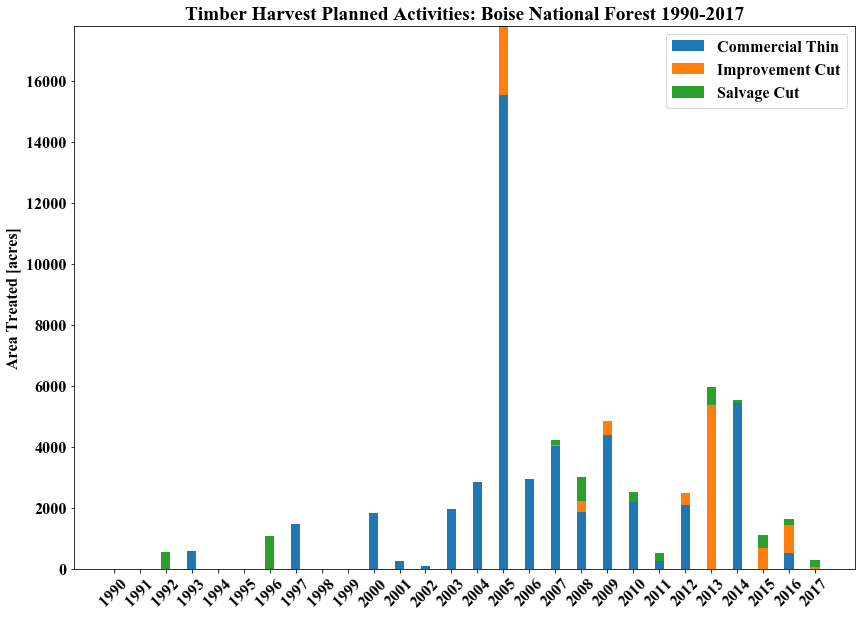

In [37]:
# Let's start with the planned activities

fig3 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

N = ID_BNF_THcommerthin_year_mod['Y'].values
ID_BNF_THcommerthin_acres = ID_BNF_THcommerthin_year_mod['NBR_UNITS1'].values
ID_BNF_THimprovecut_acres = ID_BNF_THimprovecut_year_mod['NBR_UNITS1'].values
ID_BNF_THsalvcut_acres = ID_BNF_THsalvcut_year_mod['NBR_UNITS1'].values

ind = N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bars = np.add(ID_BNF_THcommerthin_acres, ID_BNF_THimprovecut_acres).tolist()


p1 = plt.bar(ind, ID_BNF_THcommerthin_acres, width)
p2 = plt.bar(ind, ID_BNF_THimprovecut_acres, width,
             bottom=ID_BNF_THcommerthin_acres)
p3 = plt.bar(ind, ID_BNF_THsalvcut_acres, width,
             bottom=bars)

plt.ylabel('Area Treated [acres]')
plt.title('Timber Harvest Planned Activities: Boise National Forest 1990-2017')
plt.xticks(ind, rotation=45)
plt.legend(('Commercial Thin', 'Improvement Cut', 'Salvage Cut'))

plt.show()

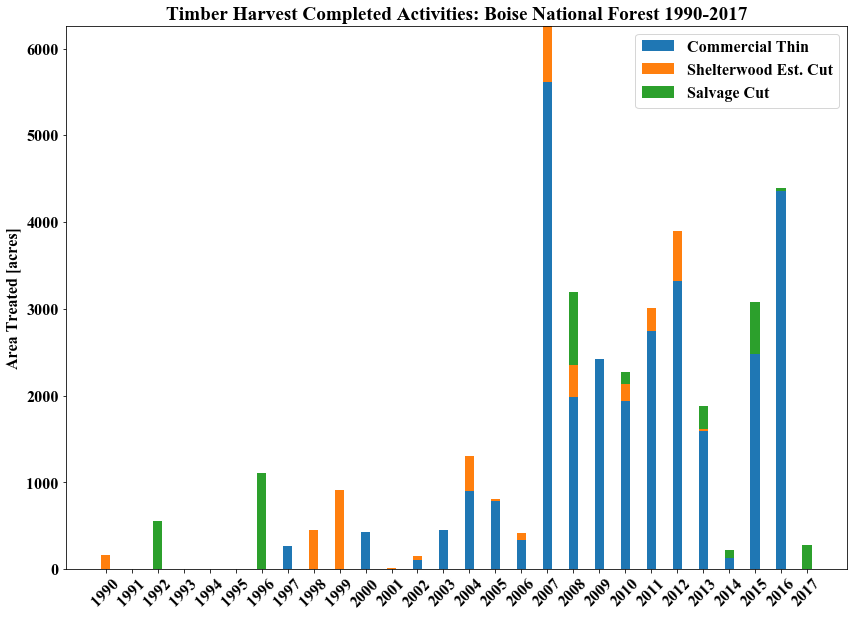

In [38]:
# And now the completed activities

fig4 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

N = ID_BNF_TH_COMP_commerthin_year_mod['Y'].values
ID_BNF_TH_COMP_commerthin_acres = ID_BNF_TH_COMP_commerthin_year_mod['NBR_UNITS1'].values
ID_BNF_TH_COMP_sheltcut_acres = ID_BNF_TH_COMP_sheltcut_year_mod['NBR_UNITS1'].values
ID_BNF_TH_COMP_salvcut_acres = ID_BNF_TH_COMP_salvcut_year_mod['NBR_UNITS1'].values

ind = N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bars = np.add(ID_BNF_TH_COMP_commerthin_acres, ID_BNF_TH_COMP_sheltcut_acres).tolist()


p1 = plt.bar(ind, ID_BNF_TH_COMP_commerthin_acres, width)
p2 = plt.bar(ind, ID_BNF_TH_COMP_sheltcut_acres, width,
             bottom=ID_BNF_TH_COMP_commerthin_acres)
p3 = plt.bar(ind, ID_BNF_TH_COMP_salvcut_acres, width,
             bottom=bars)

plt.ylabel('Area Treated [acres]')
plt.title('Timber Harvest Completed Activities: Boise National Forest 1990-2017')
plt.xticks(ind, rotation=45)
plt.legend(('Commercial Thin', 'Shelterwood Est. Cut', 'Salvage Cut'))

plt.show()

### I want to test out a new idea for figures. Just a histogram of what month things are planned in.

In [39]:
ID_BNF_TH.head()

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_2,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,282,Commercial Thin,4220,11.0,2009-09-30,2009-09-30,NaN,Boise National Forest,ID,2009-09-30,2009-09-30,NaN,2009,9,30
1,1,814,Commercial Thin,4220,25.0,2011-10-03,2012-02-21,NaN,Boise National Forest,ID,2011-10-03,2012-02-21,NaN,2011,10,3
2,2,1173,Commercial Thin,4220,48.0,2001-01-14,2004-01-14,2007-09-15,Boise National Forest,ID,2001-01-14,2004-01-14,2007-09-15,2001,1,14
3,3,1377,"Salvage Cut (intermediate treatment, not regen...",4231,180.0,2008-07-15,2008-08-20,2008-10-24,Boise National Forest,ID,2008-07-15,2008-08-20,2008-10-24,2008,7,15
4,4,2522,Commercial Thin,4220,12.0,2005-08-15,2005-10-15,NaN,Boise National Forest,ID,2005-08-15,2005-10-15,NaN,2005,8,15


In [117]:
p_commthin_months = ID_BNF_TH.loc[ID_BNF_TH['ACTIVITY_2']==4220].groupby(['M']).size().to_frame(name='count').reset_index()
p_commthin_months

,M,count
0,1,144
1,2,24
2,3,6
3,4,72
4,5,150
5,6,51
6,7,222
7,8,81
8,9,234
9,10,78


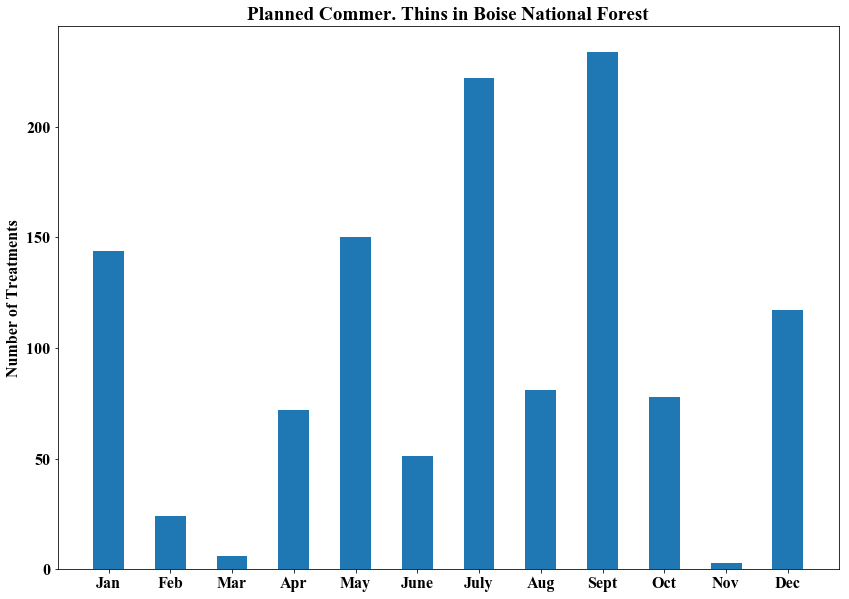

In [119]:
fig5 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

month_p_commthin = p_commthin_months['M'].values
values_p_commthin = p_commthin_months['count'].values

plt.bar(month_p_commthin, values_p_commthin, width=0.5)
plt.xticks(month_p_commthin, ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
plt.ylabel('Number of Treatments')
plt.title('Planned Commer. Thins in Boise National Forest')

plt.show()

In [120]:
c_commthin_months = ID_BNF_TH_COMP.loc[ID_BNF_TH['ACTIVITY_2']==4220].groupby(['M']).size().to_frame(name='count').reset_index()
c_commthin_months

,M,count
0,1,5
1,2,1
2,3,3
3,4,51
4,5,4
5,6,40
6,7,26
7,8,164
8,9,355
9,10,37


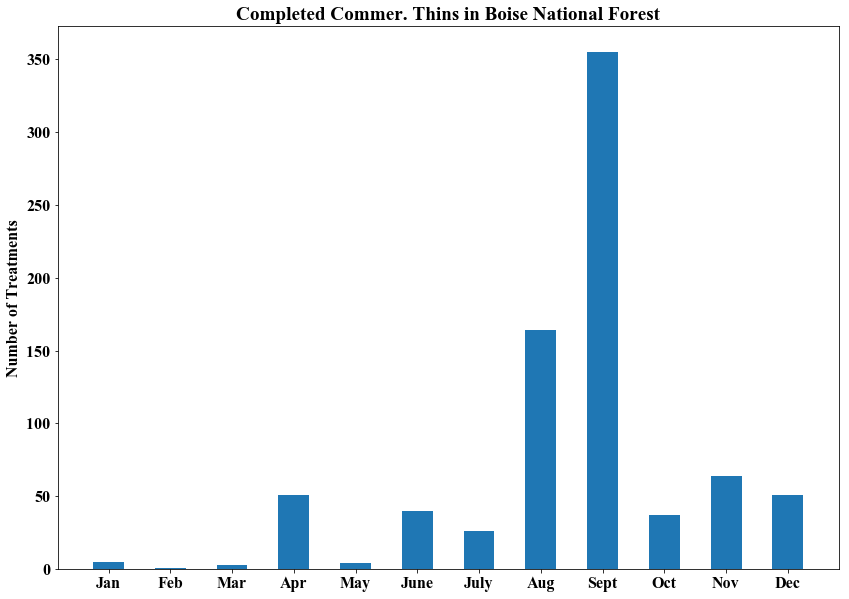

In [121]:
fig6 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

month_c_commthin = c_commthin_months['M'].values
values_c_commthin = c_commthin_months['count'].values

plt.bar(month_c_commthin, values_c_commthin, width=0.5)
plt.xticks(month_c_commthin, ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
plt.ylabel('Number of Treatments')
plt.title('Completed Commer. Thins in Boise National Forest')

plt.show()

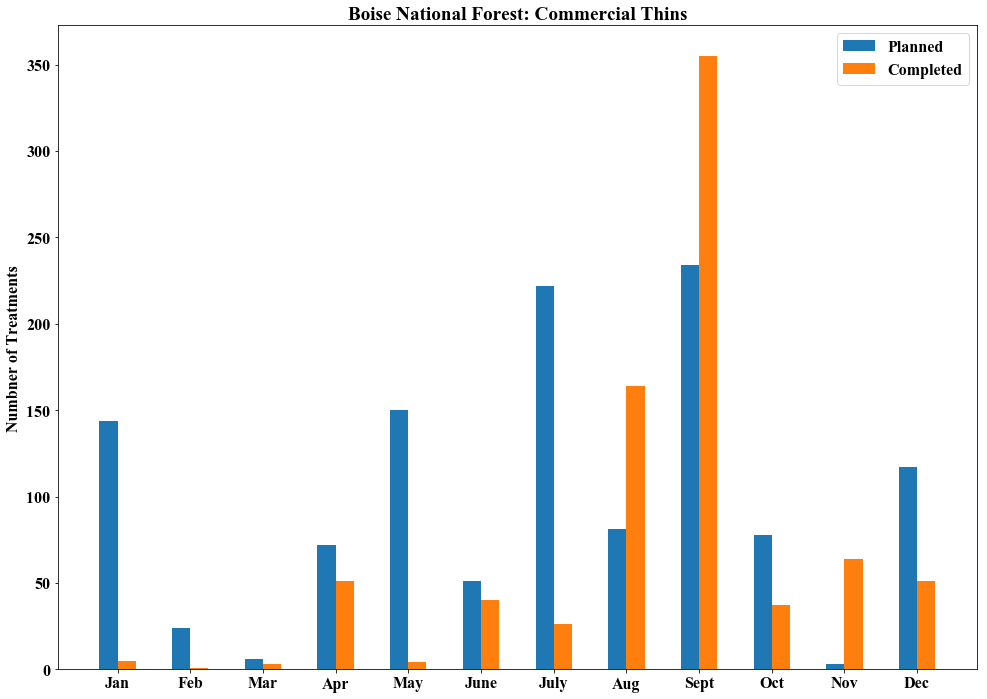

In [134]:
#fig7, ax = plt.figure(figsize=(14.0,10.0))

fig, ax = plt.subplots(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

ind = np.arange(len(month_p_commthin))
width = 0.25

rects1 = ax.bar(ind - width/2, values_p_commthin, width, label='Planned')
rects2 = ax.bar(ind + width/2, values_c_commthin, width, label='Completed')

ax.set_ylabel('Numbner of Treatments')
ax.set_title('Boise National Forest: Commercial Thins')
ax.set_xticks(ind)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
ax.legend()

def autolabel(rects, xpos='center'):
    ha = {'center': 'center','right': 'left','left':'right'}
    offset = {'center':0,'right':1,'left':-1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3,3),
                    textcoords="offset points",
                    ha=ha[xpos], va = 'bottom')
        
#autolabel(rects1, "left")
#autolabel(rects2, "right")

fig.tight_layout()
                        

plt.show()